Their Cab Stats
INDICA :26
SUMO :19
TRAVELLER :19
Our Cab Stats
INDICA :9
SUMO :3
TRAVELLER :29

~~~~~~~~~~~~~~~~~~TOTAL DISTANCE COVERED BY THEM FOR DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~
INDICA :1363.013
SUMO :1105.772
TRAVELLER :1002.378
~~~~~~~~~~~~~~~~~~TOTAL DISTANCE COVERED BY US FOR DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~
INDICA :258.897
SUMO :78.129
TRAVELLER :805.071
~~~~~~~~~~~~~~~~~~AVERAGE DISTANCE COVERED BY THEIR SINGLE CAB OF DIFFERENT TYPES~~~~~~~~~~~~~~~~~
INDICA :52.42357692307692
SUMO :58.19852631578947
TRAVELLER :52.75673684210526
~~~~~~~~~~~~~~~~~~AVERAGE DISTANCE COVERED BY OUR SINGLE CAB OF DIFFERENT TYPES~~~~~~~~~~~~~~~~~
INDICA :28.766333333333332
SUMO :26.043
TRAVELLER :27.761068965517243
~~~~~~~~~~~~~~~~~~TOTAL Price Paid by THEM For DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~
INDICA :20445.195
SUMO :16586.579999999998
TRAVELLER :20047.56
Their Total Price: :57079.33499999999
~~~~~~~~~~~~~~~~~~TOTAL Price Paid By us For DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~
INDICA :3883.

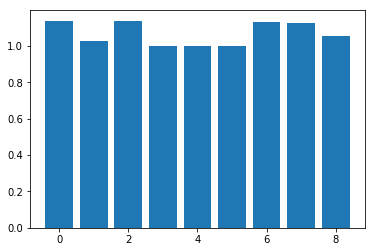

Cab Type: SUMO


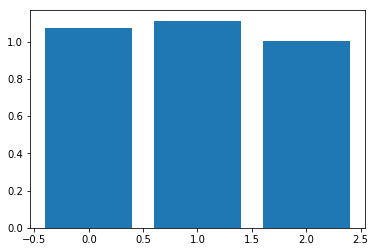

Cab Type: TT


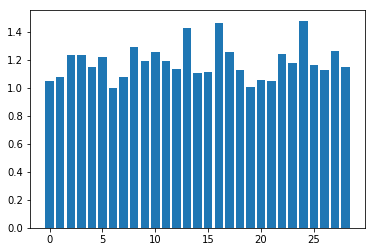

Cab Type: INDICA


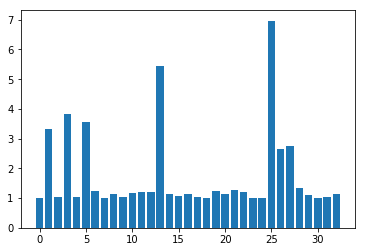

Cab Type: SUMO


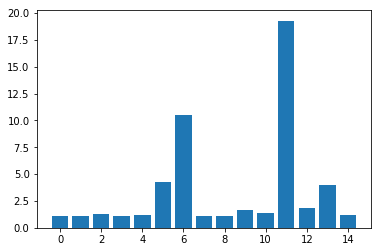

Cab Type: TT


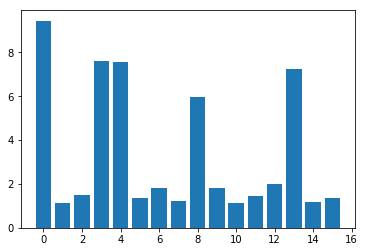

Their pool size:     people count
2           => 6
4           => 17
6           => 6
5           => 9
3           => 9
8           => 5
9           => 2
7           => 7
11           => 1
10           => 1
1           => 1
4           => 3
2           => 1
1           => 3
11           => 11
10           => 6
3           => 2
9           => 6
5           => 3
8           => 2
7           => 4
our Occupancy
CAB TYPE: INDICA       => 0.6388888888888888
CAB TYPE: SUMO       => 0.8333333333333334
CAB TYPE: TRAVELLER       => 0.8017241379310345
Their Occupancy
CAB TYPE: INDICA       => 1.0384615384615385
CAB TYPE: SUMO       => 0.7105263157894737
CAB TYPE: TRAVELLER       => 0.5614035087719298
Employee Wise droute:Ours-Red, Theirs-Blue


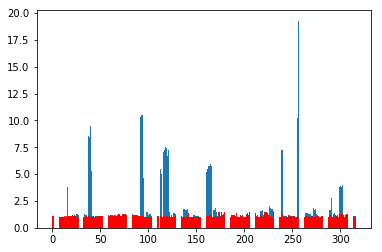

Employee Wise Distance: Ours:Red, Theirs: Blue


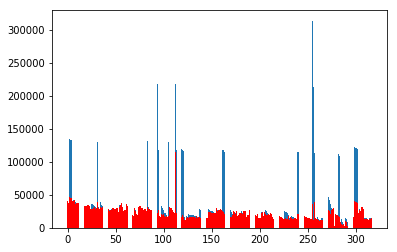

In [24]:
from matplotlib import pyplot as plt
import json

if __name__ == '__main__':
    with open('9 nov 12 shift.json') as f:
        employees = json.loads(f.read())

    with open('9 nov 12 dm.json') as f:
        distance_matrix = json.loads(f.read())

        cab_types = ['INDICA', 'SUMO', 'TRAVELLER']
    price = [15, 15, 20]
    with open('9 nov 12 h2o.json') as f:
        home_to_office_dist = json.loads(f.read())
    employee_count = len(employees)


    def get_seat(cab):
        if cab is 'INDICA':
            return 4
        elif cab is 'SUMO':
            return 6
        else:
            return 12





    def get_cab(n):
        if n <= 4:
            return 'INDICA'
        elif n <= 6:
            return 'SUMO'
        else:
            return 'TRAVELLER'
    def cab_occupancy(poools):
        # pool_count_with_types
        empcnt = 0
        pool_cnts = {}
        for pool in poools:
            if len(pool) not in pool_cnts:
                pool_cnts[len(pool)] = 0
            pool_cnts[len(pool)] += 1
        ret = [0, 0, 0]
        for k, val in pool_cnts.items():
            print("{}           => {}".format(str(k), str(val)))
            if k <= 4:
                ret[0] += k * val
            elif k <= 6:
                ret[1] += k * val
            else:
                ret[2] += k * val
        return ret


    def cab_occupancy(poools):
        # pool_count_with_types
        empcnt = 0
        pool_cnts = {}
        for pool in poools:
            if len(pool) not in pool_cnts:
                pool_cnts[len(pool)] = 0
            pool_cnts[len(pool)] += 1
        ret = [0, 0, 0]
        for k, val in pool_cnts.items():
            print("{}           => {}".format(str(k), str(val)))
            if k <= 4:
                ret[0] += k * val
            elif k <= 6:
                ret[1] += k * val
            else:
                ret[2] += k * val
        return ret


    def droute_dist(pool, employee_dists, employee_droute, employee_cabs):
        rev = pool[::-1]
        cur = rev[0]
        idd = employees.index(cur)
        total_dist = home_to_office_dist[idd]
        employee_dists[idd] = total_dist
        employee_droute[idd] = 1
        droutes = [1]
        cab = get_cab(len(pool))
        employee_cabs[idd] = cab
        for pick in rev[1:]:
            idx = employees.index(cur)
            p = employees.index(pick)
            dis = distance_matrix[p][idx]
            total_dist += dis
            x = home_to_office_dist[p]
            droute = (total_dist * 1.0) / x
            cur = pick
            employee_dists[p] = total_dist
            employee_droute[p] = droute
            employee_cabs[p] = cab
            droutes.append(droute)
        return max(droutes), total_dist


    with open('result 9 nov 12.json') as f:
        our_result = json.loads(f.read())
    our_pools = [list(map(lambda i: employees[i], pool)) for pool in our_result]
    our_count = len(our_pools)
    our_cabs = list(map(lambda pool: get_cab(len(pool)), our_pools))
    our_cab_count = [our_cabs.count('INDICA'), our_cabs.count('SUMO'), our_cabs.count('TRAVELLER')]

    our_cab_wise_droutes = [[], [], []]
    our_cab_wise_dists = [0, 0, 0]
    our_employee_wise_droute = [0] * employee_count
    our_employee_wise_dists = [0] * employee_count
    our_employee_wise_cabs = [''] * employee_count
    for pool in our_pools:
        droute, total_dist = droute_dist(pool, our_employee_wise_dists, our_employee_wise_droute,
                                         our_employee_wise_cabs)
        if len(pool) <= 4:
            i = 0
        elif len(pool) <= 6:
            i = 1
        else:
            i = 2
        our_cab_wise_droutes[i].append(droute)
        our_cab_wise_dists[i] += total_dist

    their_pools = []
    prev = employees[0]
    cur = [prev]
    for emp in employees[1:]:
        if prev['Serial No.'] >= emp['Serial No.']:
            their_pools.append(cur)
            prev = emp
            cur = [emp]
        else:
            cur.append(emp)

    if cur:
        their_pools.append(cur)

    their_count = len(their_pools)
    their_cabs=['']*their_count
    for i in range(their_count):
        their_cabs[i]=their_pools[i][0]['Vehicle Type']
    their_cab_count = [their_cabs.count('INDICA'), their_cabs.count('SUMO')+their_cabs.count('XYLO'), their_cabs.count('TT')+their_cabs.count('T T')]

    their_cab_wise_droutes = [[], [], []]
    their_cab_wise_dists = [0, 0, 0]
    their_employee_wise_droute = [0] * employee_count
    their_employee_wise_dists = [0] * employee_count
    their_employee_wise_cabs = [''] * employee_count
    for pool in their_pools:
        droute, total_dist = droute_dist(pool, their_employee_wise_dists, their_employee_wise_droute,
                                         their_employee_wise_cabs)
        if len(pool) <= 4:
            i = 0
        elif len(pool) <= 6:
            i = 1
        else:
            i = 2
        their_cab_wise_droutes[i].append(droute)
        their_cab_wise_dists[i] += total_dist

    their_stats = {}
    our_stats = {}

    print("Their Cab Stats")
    their_stats['cab_count'] = {}
    for tp, cnt in zip(cab_types, their_cab_count):
        their_stats['cab_count'][tp] = cnt
        print('{} :{}'.format(tp, cnt))

    print("Our Cab Stats")
    our_stats['cab_count'] = {}
    for tp, cnt in zip(cab_types, our_cab_count):
        our_stats['cab_count'][tp] = cnt
        print('{} :{}'.format(tp, cnt))
    print()

    print("~~~~~~~~~~~~~~~~~~TOTAL DISTANCE COVERED BY THEM FOR DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~")
    their_stats['cab_wise_distance'] = {}
    for tp, dist in zip(cab_types, their_cab_wise_dists):
        print('{} :{}'.format(tp, dist / 1000.0))
        their_stats['cab_wise_distance'][tp] = dist / 1000.0

    print("~~~~~~~~~~~~~~~~~~TOTAL DISTANCE COVERED BY US FOR DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~")
    our_stats['cab_wise_distance'] = {}
    for tp, dist in zip(cab_types, our_cab_wise_dists):
        print('{} :{}'.format(tp, dist / 1000.0))
        our_stats['cab_wise_distance'][tp] = dist / 1000.0

    print("~~~~~~~~~~~~~~~~~~AVERAGE DISTANCE COVERED BY THEIR SINGLE CAB OF DIFFERENT TYPES~~~~~~~~~~~~~~~~~")
    their_stats['cab_wise_avg_distance'] = {}
    for i in range(3):
        print('{} :{}'.format(cab_types[i], their_cab_wise_dists[i] / (1000.0 * their_cab_count[i])))
        their_stats['cab_wise_avg_distance'][cab_types[i]] = their_cab_wise_dists[i] / (1000.0 * their_cab_count[i])

    print("~~~~~~~~~~~~~~~~~~AVERAGE DISTANCE COVERED BY OUR SINGLE CAB OF DIFFERENT TYPES~~~~~~~~~~~~~~~~~")
    our_stats['cab_wise_avg_distance'] = {}
    for i in range(3):
        print('{} :{}'.format(cab_types[i], our_cab_wise_dists[i] / (1000.0 * our_cab_count[i])))
        our_stats['cab_wise_avg_distance'][cab_types[i]] = our_cab_wise_dists[i] / (1000.0 * our_cab_count[i])

    print("~~~~~~~~~~~~~~~~~~TOTAL Price Paid by THEM For DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~")
    their_stats['cab_type_price'] = {}
    their_total_price = 0
    for i in range(3):
        prc = price[i] * (their_cab_wise_dists[i] / 1000.0)
        print('{} :{}'.format(cab_types[i], prc))
        their_stats['cab_type_price'][cab_types[i]] = prc
        their_total_price += prc
    their_stats['total_price'] = their_total_price
    print('Their Total Price: :{}'.format(their_total_price))

    print("~~~~~~~~~~~~~~~~~~TOTAL Price Paid By us For DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~")
    our_total_price = 0
    our_stats['cab_type_price'] = {}
    for i in range(3):
        prc = price[i] * (our_cab_wise_dists[i] / 1000.0)
        our_stats['cab_type_price'][cab_types[i]] = prc
        print('{} :{}'.format(cab_types[i], prc))
        our_total_price += prc
    our_stats['total_price'] = our_total_price
    print('Our Total Price: :{}'.format(our_total_price))

    price_efficiency = their_total_price / our_total_price - 1
    print("Price Efficiency: {}".format(price_efficiency))

    print("~~~~~~~~~~~~~~~~~~Their Cab wise average droutes~~~~~~~~~~~~~~~~~")
    their_stats['cab_wise_avg_droutes'] = {}
    for typ, droutes in zip(cab_types, their_cab_wise_droutes):
        print("{}:     {}".format(typ, sum(droutes) / len(droutes)))
        their_stats['cab_wise_avg_droutes'][typ] = sum(droutes) / len(droutes)

    print("~~~~~~~~~~~~~~~~~~Our Cab wise average droutes~~~~~~~~~~~~~~~~~")
    our_stats['cab_wise_avg_droutes'] = {}
    for typ, droutes in zip(cab_types, our_cab_wise_droutes):
        print("{}:     {}".format(typ, sum(droutes) / len(droutes)))
        our_stats['cab_wise_avg_droutes'][typ] = sum(droutes) / len(droutes)
        
    print("OUR PLOT")
    print("Cab Type: INDICA")
    plt.bar(range(len(our_cab_wise_droutes[0])), our_cab_wise_droutes[0])
    plt.show()
    print("Cab Type: SUMO")
    plt.bar(range(len(our_cab_wise_droutes[1])), our_cab_wise_droutes[1])
    plt.show()
    print("Cab Type: TT")
    plt.bar(range(len(our_cab_wise_droutes[2])), our_cab_wise_droutes[2])
    plt.show()
    

    print("Cab Type: INDICA")
    plt.bar(range(len(their_cab_wise_droutes[0])), their_cab_wise_droutes[0])
    plt.show()
    print("Cab Type: SUMO")
    plt.bar(range(len(their_cab_wise_droutes[1])), their_cab_wise_droutes[1])
    plt.show()
    print("Cab Type: TT")
    plt.bar(range(len(their_cab_wise_droutes[2])), their_cab_wise_droutes[2])
    plt.show()
    print("Their pool size:     people count")
    their_occupancy = cab_occupancy(their_pools)
    our_occupancy = cab_occupancy(our_pools)

    print("our Occupancy")
    our_stats['occupancy'] = {}
    our_stats['people_by_cab'] = {}
    for i in range(3):
        our_stats['people_by_cab'][cab_types[i]] = our_occupancy[i]
        our_stats['occupancy'][cab_types[i]] = our_occupancy[i] / (get_seat(cab_types[i]) * our_cab_count[i])
        print("CAB TYPE: {}       => {}".format(cab_types[i],
                                                our_occupancy[i] / (get_seat(cab_types[i]) * our_cab_count[i])))


    print("Their Occupancy")
    their_stats['occupancy'] = {}
    their_stats['people_by_cab'] = {}
    for i in range(3):
        their_stats['people_by_cab'][cab_types[i]] = their_occupancy[i]
        their_stats['occupancy'][cab_types[i]] = their_occupancy[i] / (get_seat(cab_types[i]) * their_cab_count[i])
        print("CAB TYPE: {}       => {}".format(cab_types[i],
                                                their_occupancy[i] / (get_seat(cab_types[i]) * their_cab_count[i])))

    print("Employee Wise droute:Ours-Red, Theirs-Blue")
    plt.bar(range(len(their_employee_wise_droute)), their_employee_wise_droute)
    plt.bar(range(len(our_employee_wise_droute)), our_employee_wise_droute, color='red')
    plt.show()
    

    good = 0
    for i in range(len(employees)):
        if their_employee_wise_droute[i] >= our_employee_wise_droute[i]:
            good += 1
    print("Employee Wise Distance: Ours:Red, Theirs: Blue")
    plt.bar(range(len(their_employee_wise_dists)), their_employee_wise_dists)
    plt.bar(range(len(our_employee_wise_dists)), our_employee_wise_dists, color='red')



    '''with open('our 9 nov 12.json', 'w') as f:
        f.write(json.dumps(our_stats))
    with open('their 9 nov 12.json', 'w') as f:
        f.write(json.dumps(their_stats))'''

    

In [38]:
their_employee_wise_droute

[1.0119041348432973,
 1,
 3.252856276531231,
 3.3386009058882737,
 3.3386009058882737,
 1,
 1.0544798495705645,
 1.060415024954032,
 1.0501302790142222,
 1.0073883023024637,
 1.0044183020709097,
 1,
 1.0410706045223812,
 1.0469503733562413,
 1.0079082128735335,
 1,
 3.8382841245625055,
 1,
 1.0264188495120699,
 1,
 1.0788710360786102,
 1.0672023129160224,
 0.9965254099691508,
 0.9955355585783544,
 1,
 1.3015788540003548,
 1.2660447891555742,
 1.157845620583922,
 1.1140295742498925,
 1.1003236245954693,
 1,
 3.5559630535180657,
 1.043820528414082,
 1,
 1.245489941596366,
 1.2265652143700925,
 1.2306296296296297,
 1,
 8.515234247024134,
 8.46421579290842,
 9.447884205346892,
 5.259941921432604,
 1.1426049062699575,
 1.082800325619258,
 1.0392202912165336,
 1,
 1.0623960695389267,
 1.0158410575900318,
 1.0158410575900318,
 1.0082216808769793,
 1,
 1.0057104716701275,
 1.0057104716701275,
 1,
 1.1215850600501518,
 1.0827900238021317,
 1.004609232020606,
 1,
 1.0289299128905938,
 1.02444434

In [33]:
our_pools

[[{'Contact Number': 9008022001,
   'Escort': 'N',
   'GID': 455578,
   'Gender': 'M',
   'Login/Logout': 'Login',
   'Pick-Up Area': 'Naer Satya Narayana Swamy temple Opp Ayyapan bakery',
   'Pick-Up Point': 'White Field Immidahalli Main Road Satya Narayana Swamy Temple',
   'Pick-Up Time': '10:45',
   'Remarks 1': '',
   'Remarks 2': '',
   'Serial No.': 1,
   'Shift Date': '09/11/2017',
   'Shift Time': '12:15',
   'Vehicle Number': 'KA 01 AG 5257',
   'Vehicle Type': 'INDICA'},
  {'Contact Number': 8179349262,
   'Escort': 'N',
   'GID': 514035,
   'Gender': 'M',
   'Login/Logout': 'Login',
   'Pick-Up Area': 'Sarjapura Road Dommasandra PSR Flora',
   'Pick-Up Point': 'Sarjapura Road Dommasandra PSR Flora',
   'Pick-Up Time': '11:15',
   'Remarks 1': '',
   'Remarks 2': '',
   'Serial No.': 3,
   'Shift Date': '09/11/2017',
   'Shift Time': '12:15',
   'Vehicle Number': 'KA 51 D 3421',
   'Vehicle Type': 'INDICA'},
  {'Contact Number': 9663665807,
   'Escort': 'N',
   'GID': 313889

In [32]:
their_pools

[[{'Contact Number': 9731525252,
   'Escort': 'N',
   'GID': 271056,
   'Gender': 'F',
   'Login/Logout': 'Login',
   'Pick-Up Area': '8th Mail Sobha Apartement Deepak Stop',
   'Pick-Up Point': '8th Mail Nagasandra Sobha Apartement Deepak Stop',
   'Pick-Up Time': '10:30',
   'Remarks 1': '',
   'Remarks 2': '',
   'Serial No.': 1,
   'Shift Date': '09/11/2017',
   'Shift Time': '12:15',
   'Vehicle Number': 'KA 66 0371',
   'Vehicle Type': 'INDICA'},
  {'Contact Number': 9611550033,
   'Escort': 'N',
   'GID': 300111,
   'Gender': 'M',
   'Login/Logout': 'Login',
   'Pick-Up Area': 'Jalahalli Cross SM Road Ayyappa temple road Indian oil petrol pump',
   'Pick-Up Point': 'Jalahalli Cross SM Road Ayyappa temple road Indian oil petrol pump',
   'Pick-Up Time': '10:40',
   'Remarks 1': '',
   'Remarks 2': '',
   'Serial No.': 2,
   'Shift Date': '09/11/2017',
   'Shift Time': '12:15',
   'Vehicle Number': 'KA 66 0371',
   'Vehicle Type': 'INDICA'}],
 [{'Contact Number': 9379955352,
   'E